# HW08 - Encoders and Explanations (due 23 November 2023)

In this homework you will practice with dimensionality reduction and model explanation. You will use text data from headlines from the AG news agency. In particular, the information you have are the title of the article, the lead and a label categorizing the news. **Note that this is just a sample dataset, therefore, it is completely normal if the plots and results you get do not make much sense.**

The goal of this homework is to predict the label of the article from the title and the lead. One of the main problems when working with text data is that of dimensionality since text contains a high number of features. Therefore, after encoding the data, you will experiment with different dimensionality reduction methods.  

### Raw data

In [18]:
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

df = pd.read_csv('data/train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
    return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


### Pre-processed and vectorized data

The first thing to do when using text data is to *clean* them for instance, by setting everything to lower case, deleting stopwords (e.g., the, a, as, etc.) and digits. Then, this cleaned text must be encoded and transformed into numerical features. However, since this is beyond the scope of this course you just need to load the vectorized data (check our Spring Course on *Sequencing Legal DNA* if interested in this). 



In [19]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.3.0


In [20]:
##Just as reference here is the code to go from the raw data to the preprocessed and vectorized data
import spacy
#dfs = df.sample(500)
nlp = spacy.load('en_core_web_sm')
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
##TODO pre-process text as you did in HW02
def tokenize(x):
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit]
df["tokens"] = df["text"].apply(lambda x: tokenize(x))
df["preprocessed"] = df['tokens'].apply(lambda x: ' '.join(x))

##TODO vectorize the pre-processed text using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(df['preprocessed']).toarray()

In [22]:
vec.get_feature_names_out()

array(['000', '39', 'accord', 'add', 'afp', 'afp afp', 'agency', 'ago',
       'agree', 'agreement', 'ahead', 'aim', 'air', 'al', 'allow',
       'america', 'american', 'amp', 'announce', 'ap', 'ap ap', 'apple',
       'aspx', 'aspx ticker', 'athens', 'attack', 'australia',
       'australian', 'baghdad', 'bank', 'base', 'battle', 'beat', 'begin',
       'bid', 'big', 'billion', 'bomb', 'boost', 'boston', 'break',
       'bring', 'british', 'build', 'bush', 'business', 'buy', 'campaign',
       'capital', 'car', 'case', 'center', 'champion', 'championship',
       'change', 'charge', 'chief', 'china', 'chip', 'city', 'claim',
       'close', 'coach', 'com', 'com fullquote', 'com fullquote aspx',
       'come', 'commission', 'company', 'computer', 'concern', 'consumer',
       'continue', 'contract', 'control', 'corp', 'cost', 'country',
       'court', 'cup', 'customer', 'cut', 'datum', 'day', 'deal', 'death',
       'decision', 'demand', 'despite', 'develop', 'dollar', 'drive',
      

In [ ]:
words = vec.get_feature_names_out()
for i, word in enumerate(words):
    column = X[:,i]
    df['x_'+word] = column
df = df.drop(['x_000', 'x_39'], axis=1)
df.to_csv('data/news_featurized.csv')

As you can see below we now have 412 additional columns, each corresponding to one word. Each word-column takes value 1 if the word appears in the pre-processed snippet and 0 otherwise. The goal now is to predict the label of each news from these features.

In [57]:
df = pd.read_csv('data/news_featurized.csv')
del df['Unnamed: 0']
label_map = {"world": 0, "sport": 1, "business":  2, "sci/tech": 3}
df["label_enc"] = df["label"].apply(replace_label)
df.head()

,label,title,lead,text,tokens,preprocessed,x_accord,x_add,x_afp,x_afp afp,...,x_world 39,x_www,x_www investor,x_www investor reuters,x_year,x_year old,x_yesterday,x_york,x_york reuters,label_enc
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...,"['carlyle', 'look', 'commercial', 'aerospace',...",carlyle look commercial aerospace reuters reut...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...,"['oil', 'economy', 'cloud', 'stocks', 'outlook...",oil economy cloud stocks outlook reuters reute...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...,"['iraq', 'halts', 'oil', 'exports', 'main', 's...",iraq halts oil exports main southern pipeline ...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new...","['oil', 'price', 'soar', 'time', 'record', 'po...",oil price soar time record pose new menace eco...,0,0,2,1,...,0,0,0,0,0,0,0,0,0,2
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re...","['stock', 'end', 'near', 'year', 'lows', 'reut...",stock end near year lows reuters reuters stock...,0,0,0,0,...,0,0,0,0,2,0,0,0,0,2


In [59]:
columns_to_exclude = ["title", "lead", "text", "tokens", "preprocessed"]
df.drop(columns=columns_to_exclude, inplace=True)

In [60]:
features = [i for i in df.columns if i not in ['label', 'title', 'label_enc', 'lead', 'preprocessed']]
X = df[features]
y = df['label_enc']
df.info()
#df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119999 entries, 0 to 119998
Columns: 411 entries, label to label_enc
dtypes: int64(410), object(1)
memory usage: 376.3+ MB


Index(['label', 'x_accord', 'x_add', 'x_afp', 'x_afp afp', 'x_agency', 'x_ago',
       'x_agree', 'x_agreement', 'x_ahead',
       ...
       'x_world 39', 'x_www', 'x_www investor', 'x_www investor reuters',
       'x_year', 'x_year old', 'x_yesterday', 'x_york', 'x_york reuters',
       'label_enc'],
      dtype='object', length=411)

## Data Visualization

Another common problem when working with text data is trying to get a sense of the structure of the data. In this context unsupervise methods can help.

**Why do you think this is the case?**

#### !!Complete either the t-SNE OR the k-Means exercise

### t-SNE

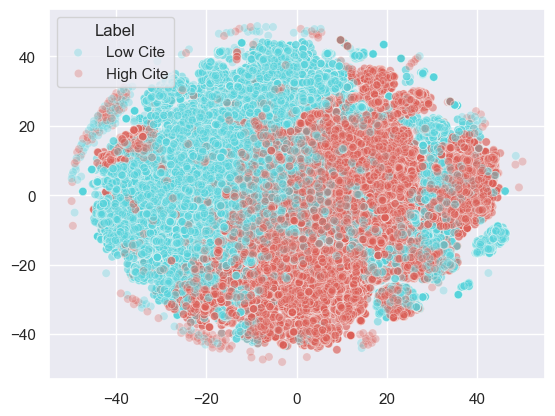

In [61]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

##TODO use tsne to create clusters of observations on a sample of 20000 news
##TODO plot the results
y = (df['label_enc']>df.label_enc.mean()).astype('int')
X = df[features]
tsne = TSNE(n_components=2, n_iter=500, perplexity=25)
Xtsne = tsne.fit_transform(X)
plot = sns.scatterplot(
    x=Xtsne[:,0], y=Xtsne[:,1],
    hue=y,
    palette=sns.color_palette("hls", 2),
    legend="full",
    alpha=0.3
)

plt.legend(title='Label', loc='upper left', labels=["Low Cite", "High Cite"])
plt.show(plot)

### k-Means

In [62]:
from sklearn.cluster import KMeans
## TODO now create 20 clusters usin kmeans clustering on the whole sample
## print the clusters for the first 10 observations
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
df['clusters'] = km.predict(X)

print(df.clusters[:20])

0     0
1     0
2     0
3     0
4     0
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    1
19    1
Name: clusters, dtype: int32


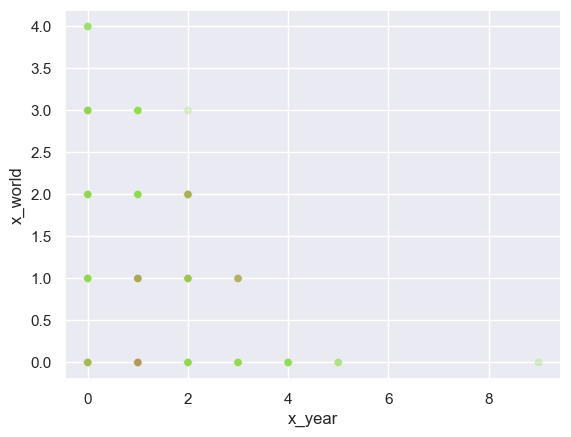

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plot = sns.scatterplot(x=df['x_year'], y=df['x_world'], hue=df['clusters'], palette=sns.color_palette("hls", 4), alpha=0.3)
plot.legend_.remove()
plt.show()


## Dimensionality Reduction

To provide some motivation for why we do dimensionality reduction, you can first try to run the following cell to train XGBoost with the whole set of fetures (I suggest you try but kill the code after 1 minute max)

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xgb = XGBClassifier()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)
xgb.fit(Xtrain, ytrain)
y_pred = xgb.predict(Xtest)
print("Accuracy Score on Test Set: ", accuracy_score(ytest, y_pred))

Accuracy Score on Test Set:  0.911


In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xtrain, Xtest, ytrain, ytest = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
xgb = XGBClassifier()

xgb.fit(Xtrain, ytrain)
y_pred = xgb.predict(Xtest)

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy Score on Test Set: ", accuracy)

Accuracy Score on Test Set:  0.9253333333333333


### Feature Selection

In [66]:
from sklearn.feature_selection import SelectKBest, chi2

##use the chi2 feature selection from sklearn to select 100 features
selector = SelectKBest(chi2, k=100)
X_filtered = selector.fit_transform(X ,y)
mask = selector.get_support(indices=True)
X_filtered = X.iloc[:,mask]
features_fs = [i for i in X.iloc[:,mask]]
features_fs[:5]

['x_al', 'x_ap', 'x_ap ap', 'x_apple', 'x_aspx']

In [71]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xtrainfs, Xtestfs, ytrainfs, ytestfs = train_test_split(X_filtered, y, test_size=0.2)

num_classes = len(y.unique())
xgb_fs = XGBClassifier(objective='multi:softmax', num_class=num_classes)

# Train the XGBoost model
xgb_fs.fit(Xtrainfs, ytrainfs)

# Make predictions on the test set
y_pred = xgb_fs.predict(Xtestfs)

# Print the accuracy score on the test set
print("Accuracy Score on Test Set: ", accuracy_score(ytestfs, y_pred))


Accuracy Score on Test Set:  0.8480416666666667


### PCA

In [72]:
from sklearn.decomposition import PCA
##compute the pca components that account for at least 50% of the variation the data
pca = PCA(n_components=.50)
Xpca = pca.fit_transform(X)
pca.n_components_

61

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

num_classes = len(set(y))
xgb_model = XGBClassifier(objective='multi:softmax', num_class=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score on Test Set: ", accuracy)

Accuracy Score on Test Set:  0.9084583333333334


**Which method do you think works best?**

PCA reduces dimensionality with the highest variance, which in turn gives better results as it includes a bit of everything. However, the model loses its explainability. With feature selection, we lose some information coming from dropped features however we keep the model explanability, which in turn can help us understand the model better and increase its transparency.

### Model Explanation

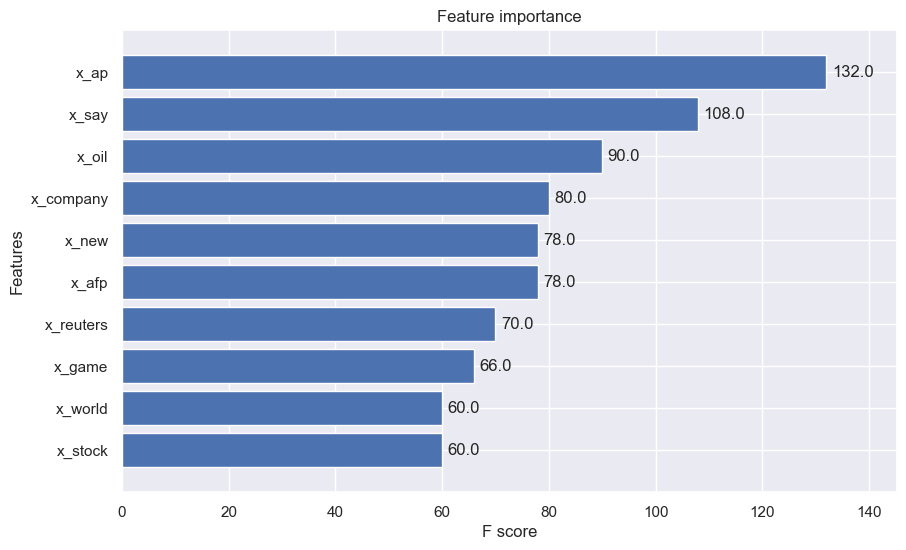

In [95]:
##TODO visualize the most important features for both models
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Retrieve the original feature names
original_feature_names = X.columns

# Map the PCA components to the original feature names
pca_feature_names = [f'PCA_{i+1}' for i in range(Xpca.shape[1])]
feature_mapping = dict(zip(pca_feature_names, original_feature_names))

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, height=0.8, ax=ax)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

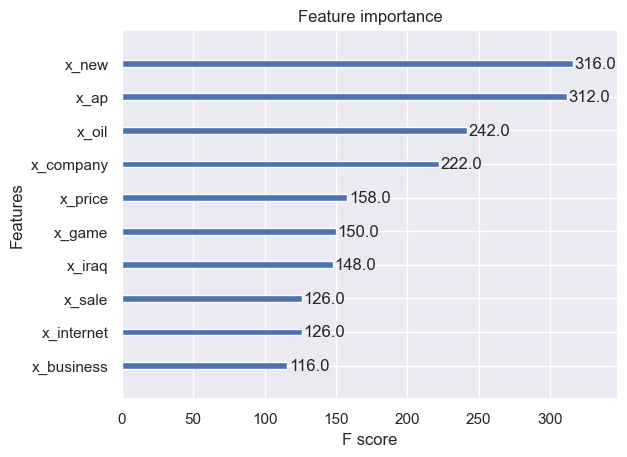

In [96]:
plot_importance(xgb_fs, max_num_features=10)